# Video Game Sales And Engagement Analysis

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
import re
import ast

## Analysis of games dataset

In [2]:
#Reading csv data
data_games=pd.read_csv("games.csv")

In [3]:
data_games.head(10)

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K
5,5,Minecraft,"Nov 18, 2011",['Mojang Studios'],4.3,2.3K,2.3K,"['Adventure', 'Simulator']",Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33K,1.8K,1.1K,230
6,6,Omori,"Dec 25, 2020","['OMOCAT', 'PLAYISM']",4.2,1.6K,1.6K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",A turn-based surreal horror RPG in which a chi...,"[""The best game I've played in my life"", ""omor...",7.2K,1.1K,4.5K,3.8K
7,7,Metroid Dread,"Oct 07, 2021","['Nintendo', 'MercurySteam']",4.3,2.1K,2.1K,"['Adventure', 'Platform']",Join intergalactic bounty hunter Samus Aran in...,['Have only been a Metroid fan for couple of y...,9.2K,759,3.4K,3.3K
8,8,Among Us,"Jun 15, 2018",['InnerSloth'],3.0,867,867,"['Indie', 'Strategy']",Join your crew-mates in a multiplayer game of ...,"[""it's a solid party game. i'm bad at lying th...",25K,470,776,126
9,9,NieR: Automata,"Feb 23, 2017","['PlatinumGames', 'Square Enix']",4.3,2.9K,2.9K,"['Brawler', 'RPG']","NieR: Automata tells the story of androids 2B,...","['Holy shit', 'im carrying the weight of the w...",18K,1.1K,6.2K,3.6K


# Starting with analysis of games dataset

In [4]:
data_games.head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [5]:
data_games.columns

Index(['Unnamed: 0', 'Title', 'Release Date', 'Team', 'Rating', 'Times Listed',
       'Number of Reviews', 'Genres', 'Summary', 'Reviews', 'Plays', 'Playing',
       'Backlogs', 'Wishlist'],
      dtype='object')

In [6]:
#Converting string values into number for those columns which contains 'K' in it
def convertKStringToInt(val):
    if isinstance(val, str) and 'k' in val.lower():
     return float(val.lower().replace('k',''))*1000
    return float(val)
     

In [7]:
for i in ['Times Listed','Number of Reviews','Plays','Playing','Backlogs','Wishlist']:
      data_games[i]=data_games[i].apply(convertKStringToInt)

In [8]:
for i in ['Times Listed','Number of Reviews','Plays','Playing','Backlogs','Wishlist']:
     print(data_games[i])

0       3900.0
1       2900.0
2       4300.0
3       3500.0
4       3000.0
         ...  
1507      94.0
1508     264.0
1509     210.0
1510     165.0
1511     184.0
Name: Times Listed, Length: 1512, dtype: float64
0       3900.0
1       2900.0
2       4300.0
3       3500.0
4       3000.0
         ...  
1507      94.0
1508     264.0
1509     210.0
1510     165.0
1511     184.0
Name: Number of Reviews, Length: 1512, dtype: float64
0       17000.0
1       21000.0
2       30000.0
3       28000.0
4       21000.0
         ...   
1507      763.0
1508     1500.0
1509     1100.0
1510      269.0
1511     1700.0
Name: Plays, Length: 1512, dtype: float64
0       3800.0
1       3200.0
2       2500.0
3        679.0
4       2400.0
         ...  
1507       5.0
1508      49.0
1509      45.0
1510      79.0
1511      11.0
Name: Playing, Length: 1512, dtype: float64
0       4600.0
1       6300.0
2       5000.0
3       4900.0
4       8300.0
         ...  
1507     223.0
1508     413.0
1509     487.0
1510 

In [9]:
data_games['Times Listed'].info

<bound method Series.info of 0       3900.0
1       2900.0
2       4300.0
3       3500.0
4       3000.0
         ...  
1507      94.0
1508     264.0
1509     210.0
1510     165.0
1511     184.0
Name: Times Listed, Length: 1512, dtype: float64>

In [10]:
#Converting Release date  to correct date format
data_games["Release Date"] = pd.to_datetime(data_games["Release Date"], format="%b %d, %Y", errors="coerce")
data_games["Year"] = data_games["Release Date"].dt.year.astype("Int64")

In [11]:
median=data_games['Year'].median()
data_games['Year']=data_games['Year'].fillna(median)

In [12]:
#1. Spliting numerial and categorical columns 
datag_num=data_games.select_dtypes("number")
datag_cat=data_games.select_dtypes("object")

In [13]:
datag_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Rating             1499 non-null   float64
 2   Times Listed       1512 non-null   float64
 3   Number of Reviews  1512 non-null   float64
 4   Plays              1512 non-null   float64
 5   Playing            1512 non-null   float64
 6   Backlogs           1512 non-null   float64
 7   Wishlist           1512 non-null   float64
 8   Year               1512 non-null   Int64  
dtypes: Int64(1), float64(7), int64(1)
memory usage: 107.9 KB


In [14]:
datag_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    1512 non-null   object
 1   Team     1511 non-null   object
 2   Genres   1512 non-null   object
 3   Summary  1511 non-null   object
 4   Reviews  1512 non-null   object
dtypes: object(5)
memory usage: 59.2+ KB


In [15]:
#Check if any duplicate values are there
datag_num.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1507    False
1508    False
1509    False
1510    False
1511    False
Length: 1512, dtype: bool

In [16]:
#Remove null values
datag_num.isna().sum()

Unnamed: 0            0
Rating               13
Times Listed          0
Number of Reviews     0
Plays                 0
Playing               0
Backlogs              0
Wishlist              0
Year                  0
dtype: int64

In [17]:
datag_num['Rating'].unique()

array([4.5, 4.3, 4.4, 4.2, 3. , 3.7, 4.1, 3.8, 3.3, 4.6, 2.6, 3.9, 4. ,
       2.7, 3.6, 3.5, 3.2, 2.8, 2.1, 3.4, 3.1, 2.9, 2.5, 1.9, 2.4, 2.3,
       nan, 1.2, 2.2, 1.6, 1.5, 4.8, 2. , 1.4, 0.7, 1.8])

In [18]:
median=datag_num['Rating'].median()
datag_num['Rating']=datag_num['Rating'].fillna(median)

In [19]:
datag_num.isna().sum()

Unnamed: 0           0
Rating               0
Times Listed         0
Number of Reviews    0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
Year                 0
dtype: int64

In [20]:
#Now checking null values for categorial values
datag_cat.isna().sum()

Title      0
Team       1
Genres     0
Summary    1
Reviews    0
dtype: int64

In [21]:
for i in ['Team','Summary']:
    datag_cat[i]= datag_cat[i].fillna(datag_cat[i].mode()[0])

In [22]:
datag_cat.isna().sum()

Title      0
Team       0
Genres     0
Summary    0
Reviews    0
dtype: int64

<Figure size 400x200 with 0 Axes>

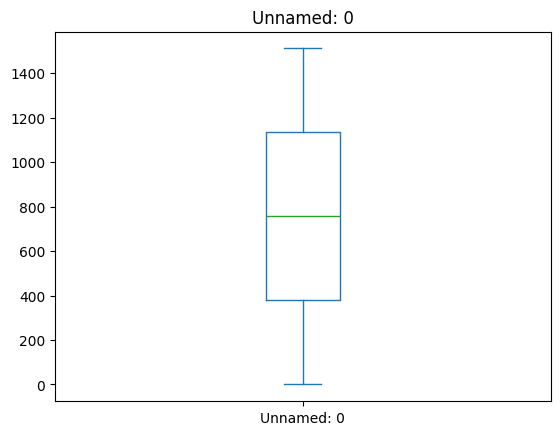

<Figure size 400x200 with 0 Axes>

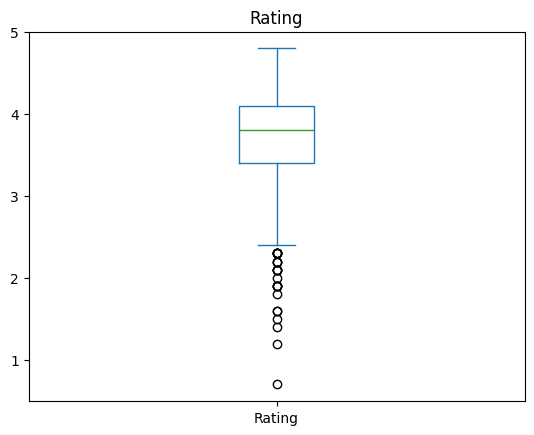

<Figure size 400x200 with 0 Axes>

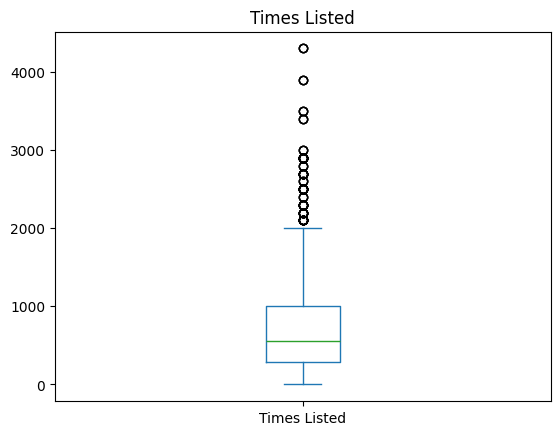

<Figure size 400x200 with 0 Axes>

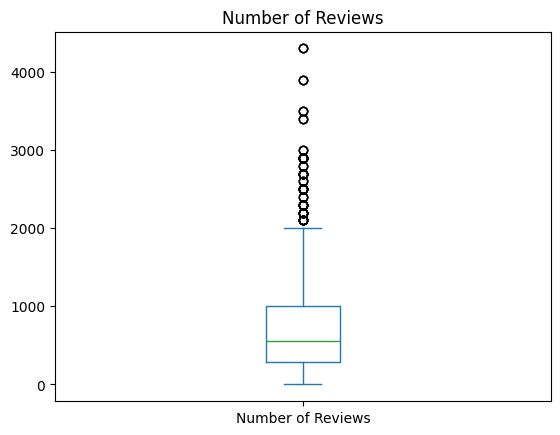

<Figure size 400x200 with 0 Axes>

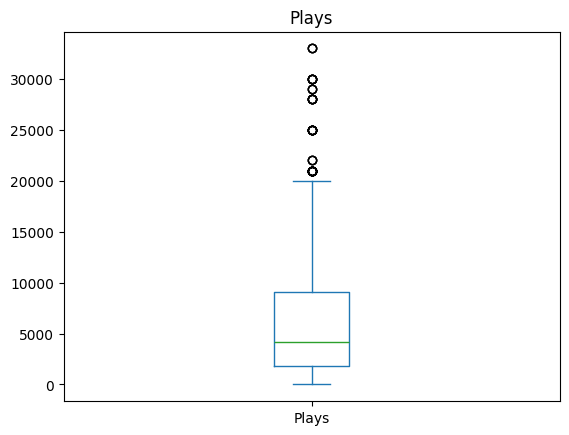

<Figure size 400x200 with 0 Axes>

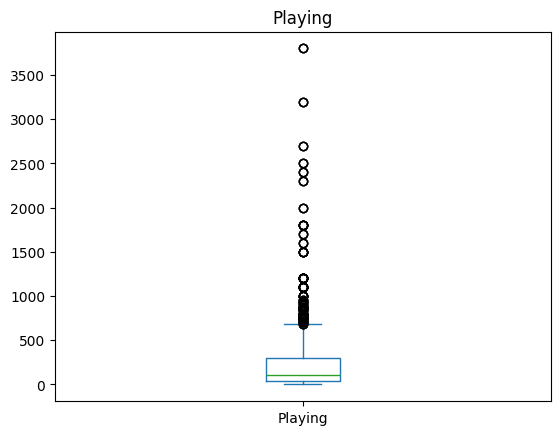

<Figure size 400x200 with 0 Axes>

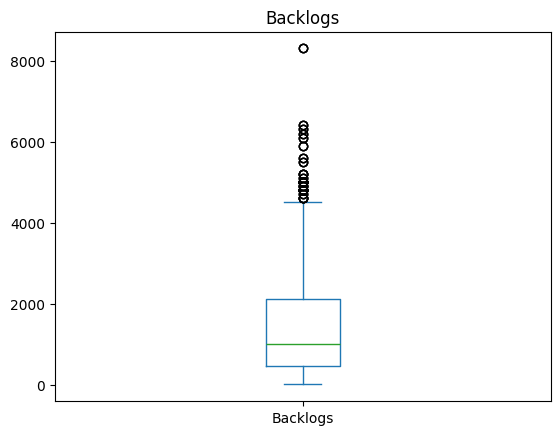

<Figure size 400x200 with 0 Axes>

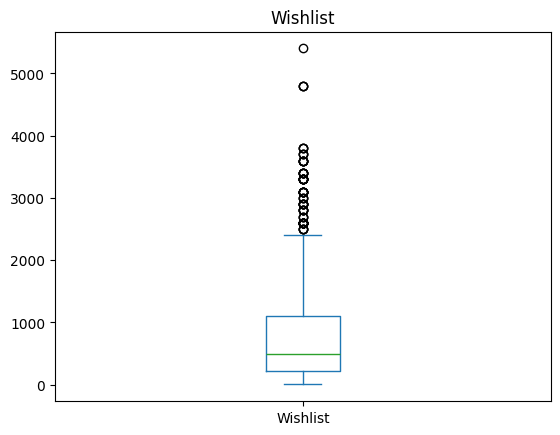

<Figure size 400x200 with 0 Axes>

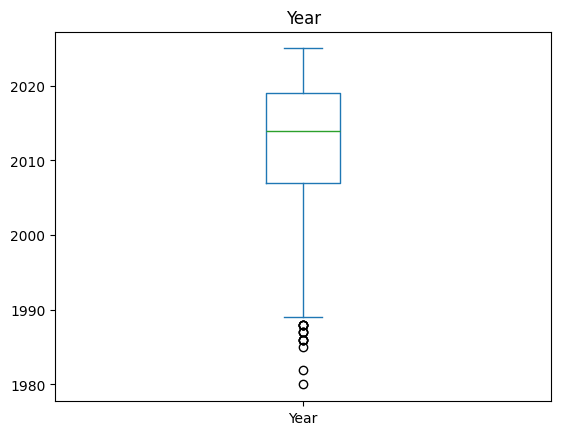

In [23]:
#Outlier Detection
for i in datag_num.columns:
    plt.figure(figsize=(4, 2))  # optional: controls the size
    datag_num[[i]].plot(kind='box', title=i)
    plt.show()

In [24]:
datag_cat.head()

,Title,Team,Genres,Summary,Reviews
0,Elden Ring,"['Bandai Namco Entertainment', 'FromSoftware']","['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o..."
1,Hades,['Supergiant Games'],"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...
2,The Legend of Zelda: Breath of the Wild,"['Nintendo', 'Nintendo EPD Production Group No...","['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...
3,Undertale,"['tobyfox', '8-4']","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...
4,Hollow Knight,['Team Cherry'],"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with..."


In [25]:
def clean_text_col(s):
  text = s.astype(str).str.lower().str.strip()
  text = text.apply(lambda x: re.sub(r"[^a-zA-Z0-9, ]", "", x))
  return text

for i in ["Title","Team","Summary", "Reviews"]:
   datag_cat[i]=clean_text_col(datag_cat[i])

In [26]:
datag_cat['Team'].head()

0        bandai namco entertainment, fromsoftware
1                                supergiant games
2    nintendo, nintendo epd production group no 3
3                                     tobyfox, 84
4                                     team cherry
Name: Team, dtype: object

In [27]:
datag_cat.head()

,Title,Team,Genres,Summary,Reviews
0,elden ring,"bandai namco entertainment, fromsoftware","['Adventure', 'RPG']","elden ring is a fantasy, action and open world...",the first playthrough of elden ring is one of ...
1,hades,supergiant games,"['Adventure', 'Brawler', 'Indie', 'RPG']",a roguelite hack and slash dungeon crawler in ...,convinced this is a roguelike for people who d...
2,the legend of zelda breath of the wild,"nintendo, nintendo epd production group no 3","['Adventure', 'RPG']",the legend of zelda breath of the wild is the ...,this game is the game that is not csgo that i ...
3,undertale,"tobyfox, 84","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","a small child falls into the underground, wher...",soundtrack is tied for 1 with nier automata a...
4,hollow knight,team cherry,"['Adventure', 'Indie', 'Platform']",a 2d metroidvania with an emphasis on close co...,"this games worldbuilding is incredible, with i..."


In [28]:
def safe_literal_eval(x):
  if pd.notna(x) and isinstance(x, str) and x.startswith("["):
      try:
       return ast.literal_eval(x)
      except (ValueError, SyntaxError):
          return np.nan
  return x

datag_cat["Genres"] = datag_cat["Genres"].apply(safe_literal_eval)

In [29]:
#Now merging both the columns
datag_merged= pd.merge(datag_num,datag_cat, how='inner',left_index=True, right_index=True)

In [30]:
datag_merged

,Unnamed: 0,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist,Year,Title,Team,Genres,Summary,Reviews
0,0,4.5,3900.0,3900.0,17000.0,3800.0,4600.0,4800.0,2022,elden ring,"bandai namco entertainment, fromsoftware","[Adventure, RPG]","elden ring is a fantasy, action and open world...",the first playthrough of elden ring is one of ...
1,1,4.3,2900.0,2900.0,21000.0,3200.0,6300.0,3600.0,2019,hades,supergiant games,"[Adventure, Brawler, Indie, RPG]",a roguelite hack and slash dungeon crawler in ...,convinced this is a roguelike for people who d...
2,2,4.4,4300.0,4300.0,30000.0,2500.0,5000.0,2600.0,2017,the legend of zelda breath of the wild,"nintendo, nintendo epd production group no 3","[Adventure, RPG]",the legend of zelda breath of the wild is the ...,this game is the game that is not csgo that i ...
3,3,4.2,3500.0,3500.0,28000.0,679.0,4900.0,1800.0,2015,undertale,"tobyfox, 84","[Adventure, Indie, RPG, Turn Based Strategy]","a small child falls into the underground, wher...",soundtrack is tied for 1 with nier automata a...
4,4,4.4,3000.0,3000.0,21000.0,2400.0,8300.0,2300.0,2017,hollow knight,team cherry,"[Adventure, Indie, Platform]",a 2d metroidvania with an emphasis on close co...,"this games worldbuilding is incredible, with i..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1507,3.2,94.0,94.0,763.0,5.0,223.0,67.0,2010,back to the future the game,telltale games,"[Adventure, Point-and-Click]",back to the future the game is one of telltale...,very enjoyable game the story adds onto the mo...
1508,1508,2.9,264.0,264.0,1500.0,49.0,413.0,107.0,2019,team sonic racing,"sumo digital, sega","[Arcade, Racing]",team sonic racing combines the best elements o...,"jogo morto mas bom, not my cup of tea, compare..."
1509,1509,3.7,210.0,210.0,1100.0,45.0,487.0,206.0,2012,dragons dogma,capcom,"[Brawler, RPG]","set in a huge open world, dragons dogma dark a...","underrated, a grandes rasgos, es como un mmo p..."
1510,1510,4.1,165.0,165.0,269.0,79.0,388.0,602.0,2020,baldurs gate 3,larian studios,"[Adventure, RPG, Strategy, Tactical, Turn Base...","an ancient evil has returned to baldurs gate, ...","bu tre bu oyunla girmeye almak hatayd sanrm, e..."


In [31]:
datag_merged.isna().sum()

Unnamed: 0           0
Rating               0
Times Listed         0
Number of Reviews    0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
Year                 0
Title                0
Team                 0
Genres               0
Summary              0
Reviews              0
dtype: int64

In [32]:
#Questions

                                          Title  Rating
1252           elden ring shadow of the erdtree     4.8
1138                              halflife alyx     4.6
1286                                tokyo necro     4.6
1198  metal gear solid 3 snake eater hd edition     4.6
28                  disco elysium the final cut     4.6
139                               disco elysium     4.6
894                               disco elysium     4.6
252                 umineko when they cry chiru     4.6
1035                 bloodborne the old hunters     4.6
43                                  outer wilds     4.6


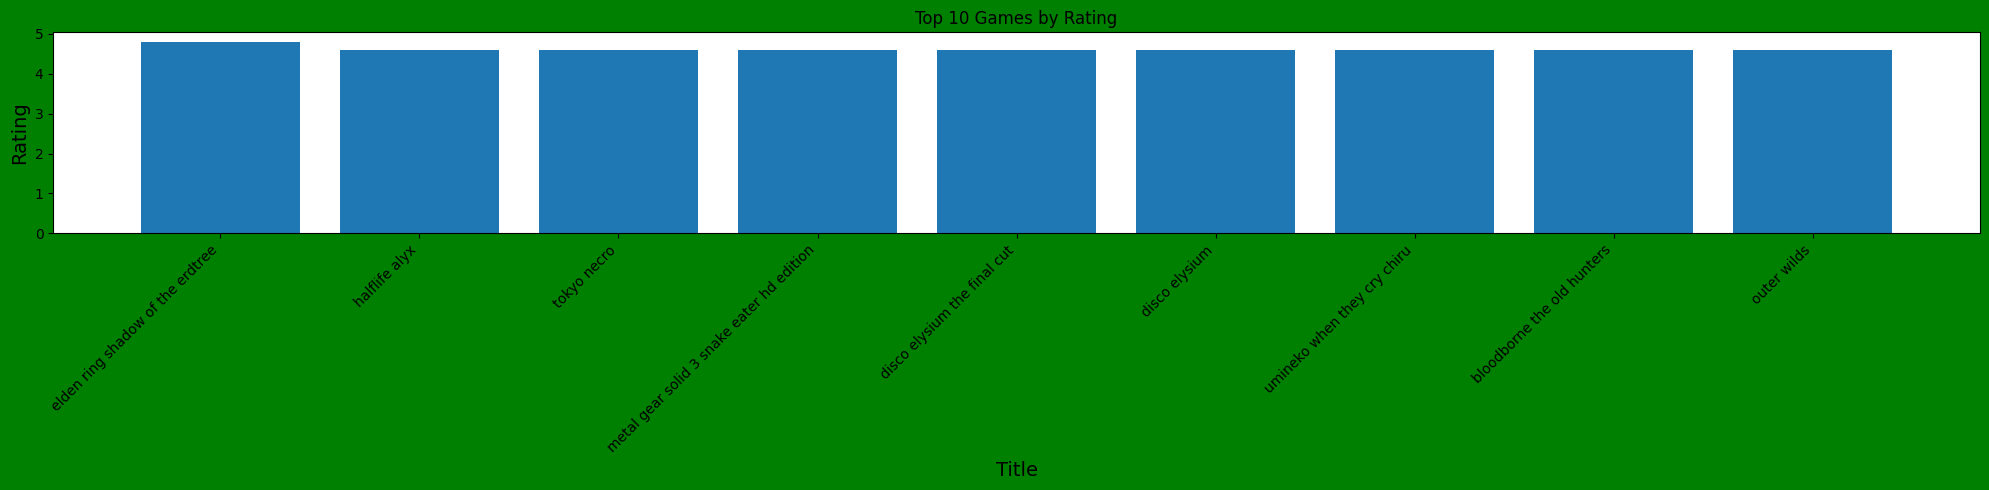

In [33]:
#1.What are the top-rated games by user reviews?

topRated=datag_merged[["Title","Rating"]].dropna().sort_values(by="Rating",ascending=False).head(10)
print(topRated)
plt.figure(figsize=(20,5),facecolor="green")
plt.bar(topRated["Title"],topRated["Rating"])
plt.xlabel("Title", size=14)
plt.ylabel("Rating", size=14)
plt.title("Top 10 Games by Rating")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Team
zaum                                         4.600
07th expansion                               4.600
bay 12 games, kitfox games                   4.600
sony computer entertainment, fromsoftware    4.600
activision, fromsoftware                     4.600
valve                                        4.600
inlusio interactive, io interactive          4.600
konami digital entertainment                 4.600
mobius digital, annapurna interactive        4.575
fromsoftware, sony computer entertainment    4.540
Name: Rating, dtype: float64


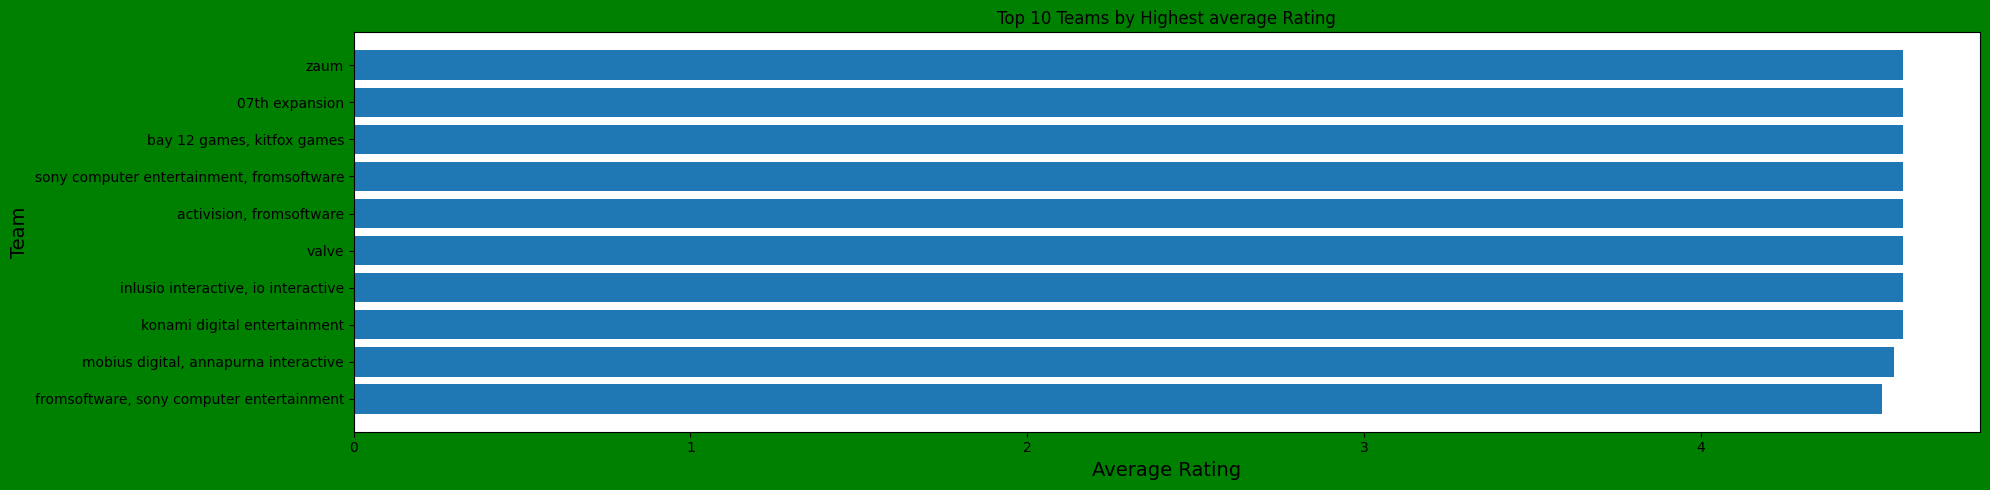

In [34]:
#2. Which developers (Teams) have the highest average ratings?

highAvg_team = datag_merged.groupby("Team")["Rating"].mean().sort_values(ascending=False).head(10)
print(highAvg_team)
plt.figure(figsize=(20,5),facecolor="green")
plt.barh(highAvg_team.index.astype(str),highAvg_team.values)
plt.gca().invert_yaxis()
plt.xlabel("Average Rating", size=14)
plt.ylabel("Team", size=14)
plt.title("Top 10 Teams by Highest average Rating")
plt.tight_layout()
plt.show()


Genres
Adventure              1014
RPG                     523
Shooter                 353
Platform                329
Indie                   284
Puzzle                  176
Brawler                 159
Strategy                142
Simulator               125
Turn Based Strategy      99
Name: count, dtype: int64


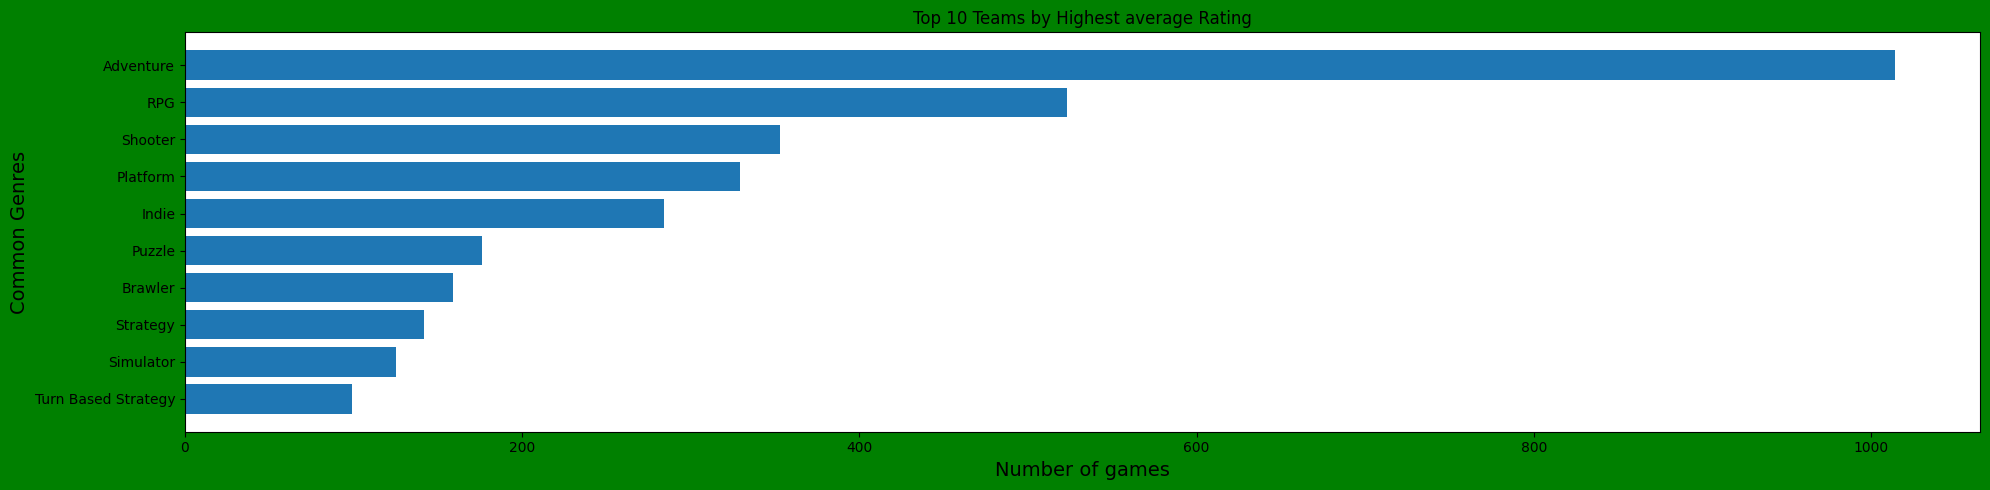

In [35]:
#3.What are the most common genres in the dataset?
df_exploded = datag_merged.explode('Genres')
common_genres = df_exploded['Genres'].value_counts().head(10).sort_values(ascending=False)
print(common_genres)
plt.figure(figsize=(20,5),facecolor="green")
plt.barh(common_genres.index.astype(str),common_genres.values)
plt.xlabel("Number of games", size=14)
plt.ylabel("Common Genres", size=14)
plt.gca().invert_yaxis() #brings the hishest value to the top
plt.title("Top 10 Teams by Highest average Rating")
plt.tight_layout()
plt.show()


     Unnamed: 0  Rating  Times Listed  Number of Reviews    Plays  Playing  \
4             4     4.4        3000.0             3000.0  21000.0   2400.0   
342         342     4.4        2700.0             2700.0  15000.0   1800.0   
777         777     4.3        2900.0             2900.0  21000.0   3200.0   
9             9     4.3        2900.0             2900.0  18000.0   1100.0   
51           51     4.3        2000.0             2000.0  17000.0   1200.0   
15           15     4.2        2800.0             2800.0  20000.0   1200.0   
790         790     4.5        3400.0             3400.0  17000.0   1100.0   
343         343     4.4        2900.0             2900.0  19000.0   1700.0   
856         856     3.6        1300.0             1300.0   9600.0    591.0   
813         813     4.2        1900.0             1900.0  13000.0   1500.0   

     Backlogs  Wishlist  Year                    Title  \
4      8300.0    2300.0  2017            hollow knight   
342    6400.0    2000.0  

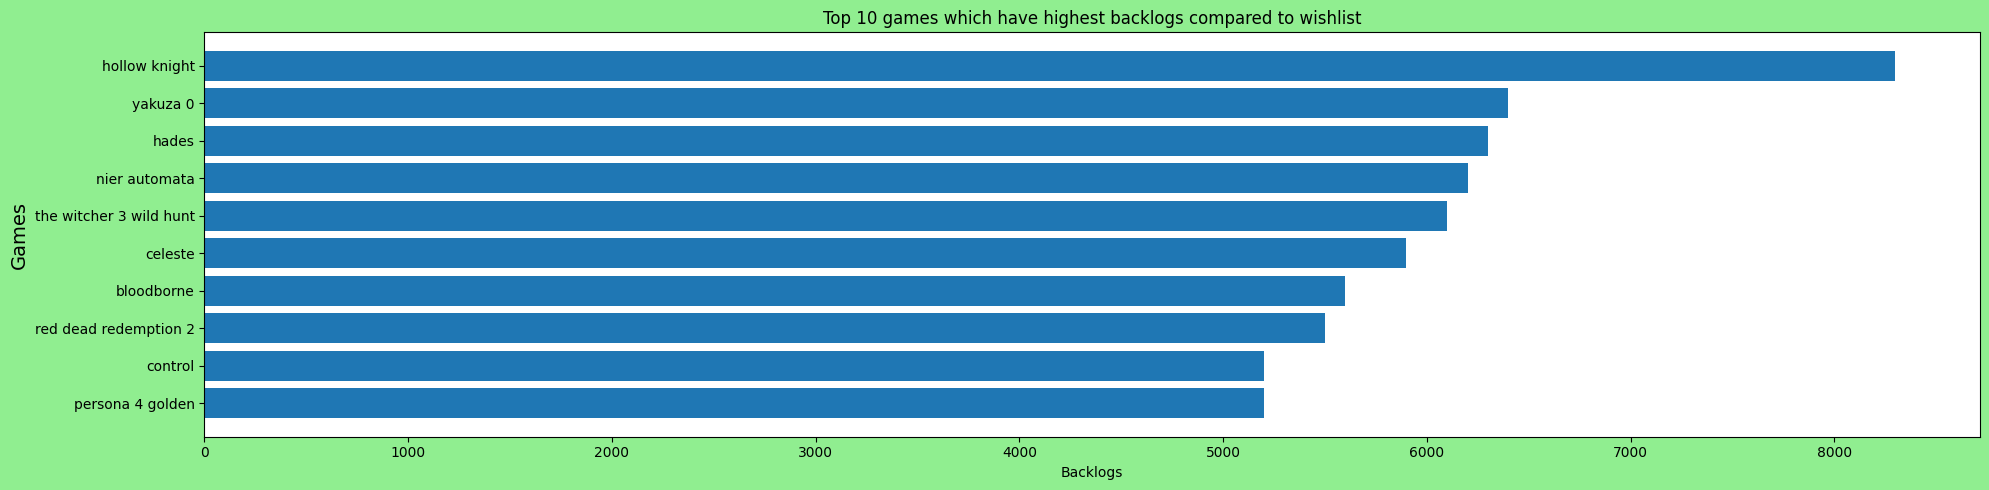

In [36]:
#4.Which games have the highest backlog compared to wishlist?
condition = datag_merged['Backlogs'] > datag_merged['Wishlist']
backlog_games = datag_merged[condition]
highest_backlog_games = backlog_games.sort_values(by='Backlogs' ,ascending=False).drop_duplicates(subset='Title').head(10)
print(highest_backlog_games)
plt.figure(figsize=(20,5), facecolor="lightgreen")
plt.barh(highest_backlog_games['Title'],highest_backlog_games['Backlogs'])
plt.gca().invert_yaxis()
plt.xlabel("Backlogs")
plt.ylabel("Games", size=14)
plt.title("Top 10 games which have highest backlogs compared to wishlist")
plt.tight_layout()
plt.show()

Year
1980      1
1982      1
1985      1
1986      4
1987      3
1988      5
1989      5
1990      6
1991     11
1992      6
1993     12
1994     11
1995     12
1996     15
1997     18
1998     16
1999     25
2000     15
2001     30
2002     22
2003     26
2004     37
2005     41
2006     32
2007     50
2008     44
2009     40
2010     58
2011     50
2012     60
2013     68
2014     62
2015     73
2016     75
2017     70
2018     77
2019     87
2020     74
2021     97
2022    132
2023     38
2024      1
2025      1
Name: count, dtype: Int64


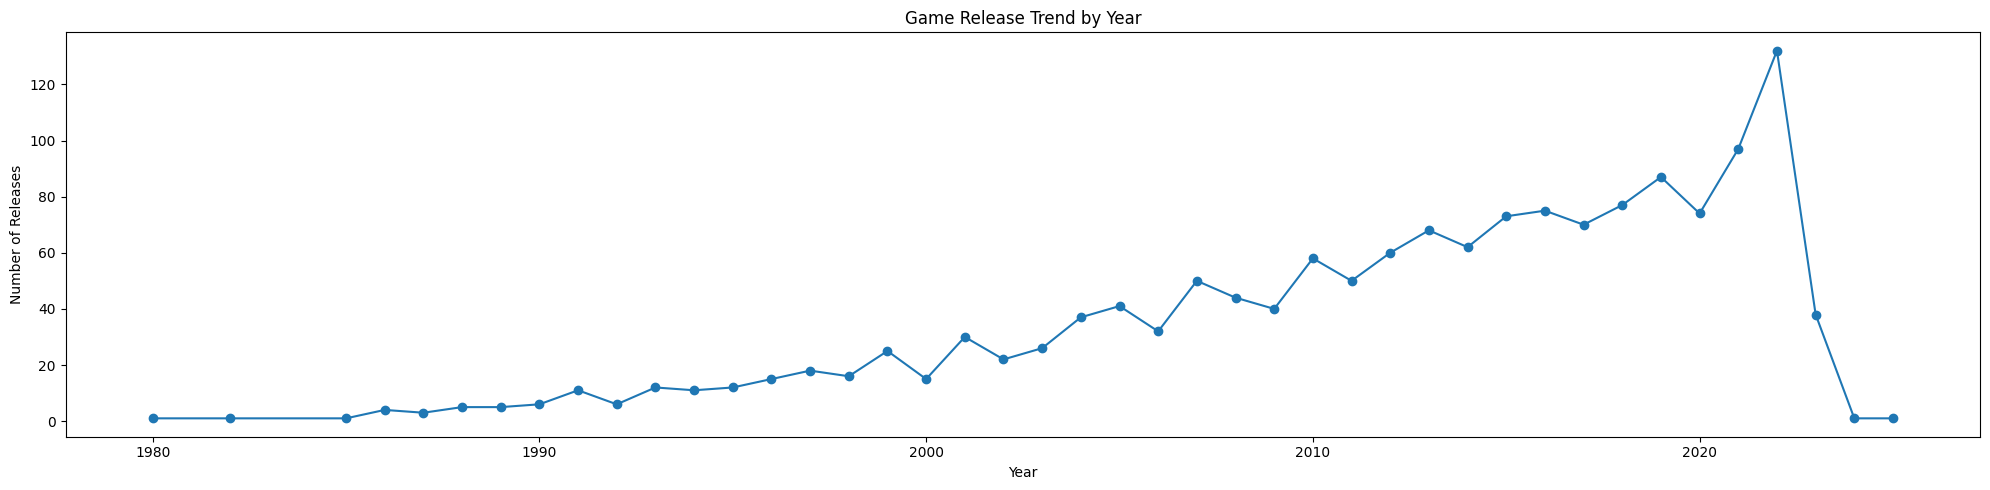

In [37]:
#5.What is the game release trend across years?
releases_counts = datag_merged['Year'].value_counts().sort_index()
print(releases_counts)
fig = plt.figure(figsize=(20,5))
plt.plot(releases_counts.index, releases_counts.values, marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.title("Game Release Trend by Year")
plt.tight_layout()


In [38]:
datag_merged.head()

,Unnamed: 0,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist,Year,Title,Team,Genres,Summary,Reviews
0,0,4.5,3900.0,3900.0,17000.0,3800.0,4600.0,4800.0,2022,elden ring,"bandai namco entertainment, fromsoftware","[Adventure, RPG]","elden ring is a fantasy, action and open world...",the first playthrough of elden ring is one of ...
1,1,4.3,2900.0,2900.0,21000.0,3200.0,6300.0,3600.0,2019,hades,supergiant games,"[Adventure, Brawler, Indie, RPG]",a roguelite hack and slash dungeon crawler in ...,convinced this is a roguelike for people who d...
2,2,4.4,4300.0,4300.0,30000.0,2500.0,5000.0,2600.0,2017,the legend of zelda breath of the wild,"nintendo, nintendo epd production group no 3","[Adventure, RPG]",the legend of zelda breath of the wild is the ...,this game is the game that is not csgo that i ...
3,3,4.2,3500.0,3500.0,28000.0,679.0,4900.0,1800.0,2015,undertale,"tobyfox, 84","[Adventure, Indie, RPG, Turn Based Strategy]","a small child falls into the underground, wher...",soundtrack is tied for 1 with nier automata a...
4,4,4.4,3000.0,3000.0,21000.0,2400.0,8300.0,2300.0,2017,hollow knight,team cherry,"[Adventure, Indie, Platform]",a 2d metroidvania with an emphasis on close co...,"this games worldbuilding is incredible, with i..."


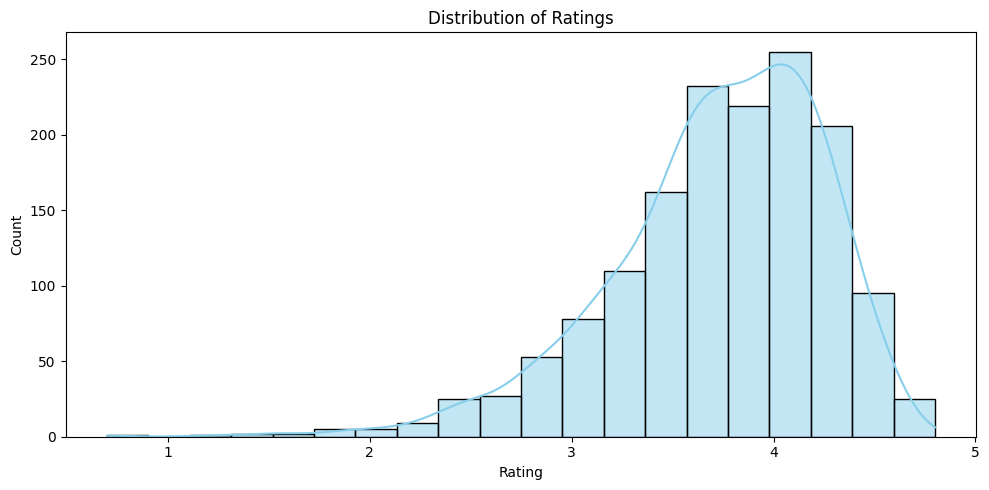

In [39]:
#6.What is the distribution of user ratings?
plt.figure(figsize=(10,5))
sns.histplot(datag_merged["Rating"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


                                        Title  Wishlist
972  the legend of zelda tears of the kingdom    5400.0
326                                elden ring    4800.0
332                                     omori    3800.0
357            nier replicant ver122474487139    3700.0
785                             nier automata    3600.0
327                                     hades    3600.0
811                  sekiro shadows die twice    3400.0
11                                      stray    3400.0
340                                bloodborne    3300.0
333                             metroid dread    3300.0


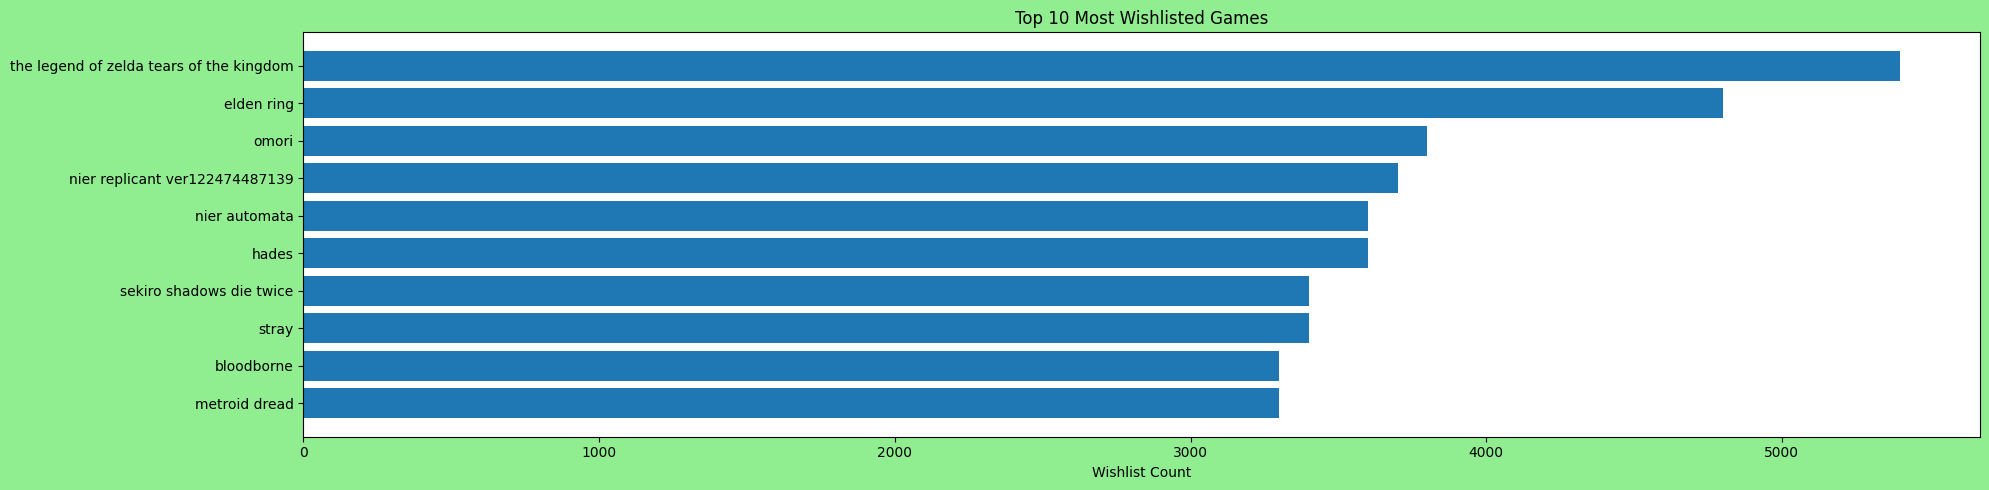

In [40]:
#7. What are the top 10 most wishlisted games?
wishlisted_games= datag_merged[["Title","Wishlist"]].sort_values(by='Wishlist' ,ascending=False).drop_duplicates(subset=['Title']).head(10)
print(wishlisted_games)
plt.figure(figsize=(20,5), facecolor="lightgreen")
plt.barh(wishlisted_games['Title'],wishlisted_games['Wishlist'])
plt.gca().invert_yaxis()
plt.xlabel("Wishlist Count")
plt.title("Top 10 Most Wishlisted Games")
plt.tight_layout()
plt.show()



Genres
MOBA                   10166.666667
Shooter                 7522.872521
Racing                  7197.000000
Platform                7162.522796
Turn Based Strategy     6834.181818
Adventure               6546.182446
Brawler                 6436.415094
RPG                     6296.061185
Sport                   5977.320000
Simulator               5738.080000
Indie                   5461.010563
Puzzle                  5296.772727
Arcade                  5161.000000
Fighting                5112.486111
Strategy                4920.838028
Tactical                4476.980000
Point-and-Click         4028.630435
Real Time Strategy      3860.000000
Card & Board Game       3609.187500
Visual Novel            3572.295775
Music                   2715.240000
Quiz/Trivia             2525.000000
Pinball                 1600.000000
Name: Plays, dtype: float64


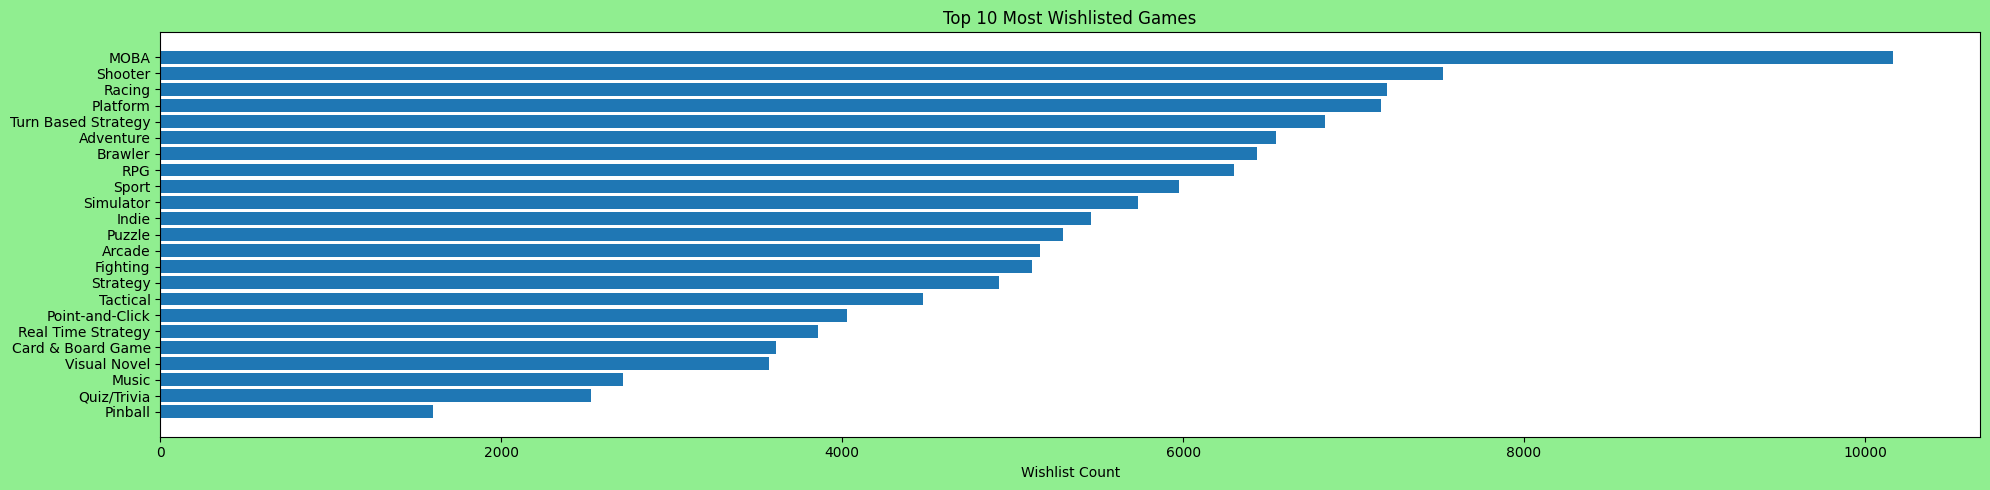

In [41]:
#8.What’s the average number of plays per genre?
genr_explode = datag_merged.explode('Genres')
avg_plays_genre = genr_explode.groupby(["Genres"])["Plays"].mean().dropna().sort_values(ascending=False)
print(avg_plays_genre)
plt.figure(figsize=(20,5), facecolor="lightgreen")
plt.barh(avg_plays_genre.index.astype(str),avg_plays_genre.values)
plt.gca().invert_yaxis()
plt.xlabel("Wishlist Count")
plt.title("Top 10 Most Wishlisted Games")
plt.tight_layout()
plt.show()

In [42]:
datag_merged.head()

,Unnamed: 0,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist,Year,Title,Team,Genres,Summary,Reviews
0,0,4.5,3900.0,3900.0,17000.0,3800.0,4600.0,4800.0,2022,elden ring,"bandai namco entertainment, fromsoftware","[Adventure, RPG]","elden ring is a fantasy, action and open world...",the first playthrough of elden ring is one of ...
1,1,4.3,2900.0,2900.0,21000.0,3200.0,6300.0,3600.0,2019,hades,supergiant games,"[Adventure, Brawler, Indie, RPG]",a roguelite hack and slash dungeon crawler in ...,convinced this is a roguelike for people who d...
2,2,4.4,4300.0,4300.0,30000.0,2500.0,5000.0,2600.0,2017,the legend of zelda breath of the wild,"nintendo, nintendo epd production group no 3","[Adventure, RPG]",the legend of zelda breath of the wild is the ...,this game is the game that is not csgo that i ...
3,3,4.2,3500.0,3500.0,28000.0,679.0,4900.0,1800.0,2015,undertale,"tobyfox, 84","[Adventure, Indie, RPG, Turn Based Strategy]","a small child falls into the underground, wher...",soundtrack is tied for 1 with nier automata a...
4,4,4.4,3000.0,3000.0,21000.0,2400.0,8300.0,2300.0,2017,hollow knight,team cherry,"[Adventure, Indie, Platform]",a 2d metroidvania with an emphasis on close co...,"this games worldbuilding is incredible, with i..."


Team
capcom                                     36
square enix                                31
nintendo, game freak                       19
nintendo                                   19
nintendo, nintendo ead                     19
nintendo ead, nintendo                     16
intelligent systems co, ltd, nintendo      14
sega, sonic team                           11
hal laboratory, nintendo                   10
ubisoft montreal, ubisoft entertainment    10
dtype: int64


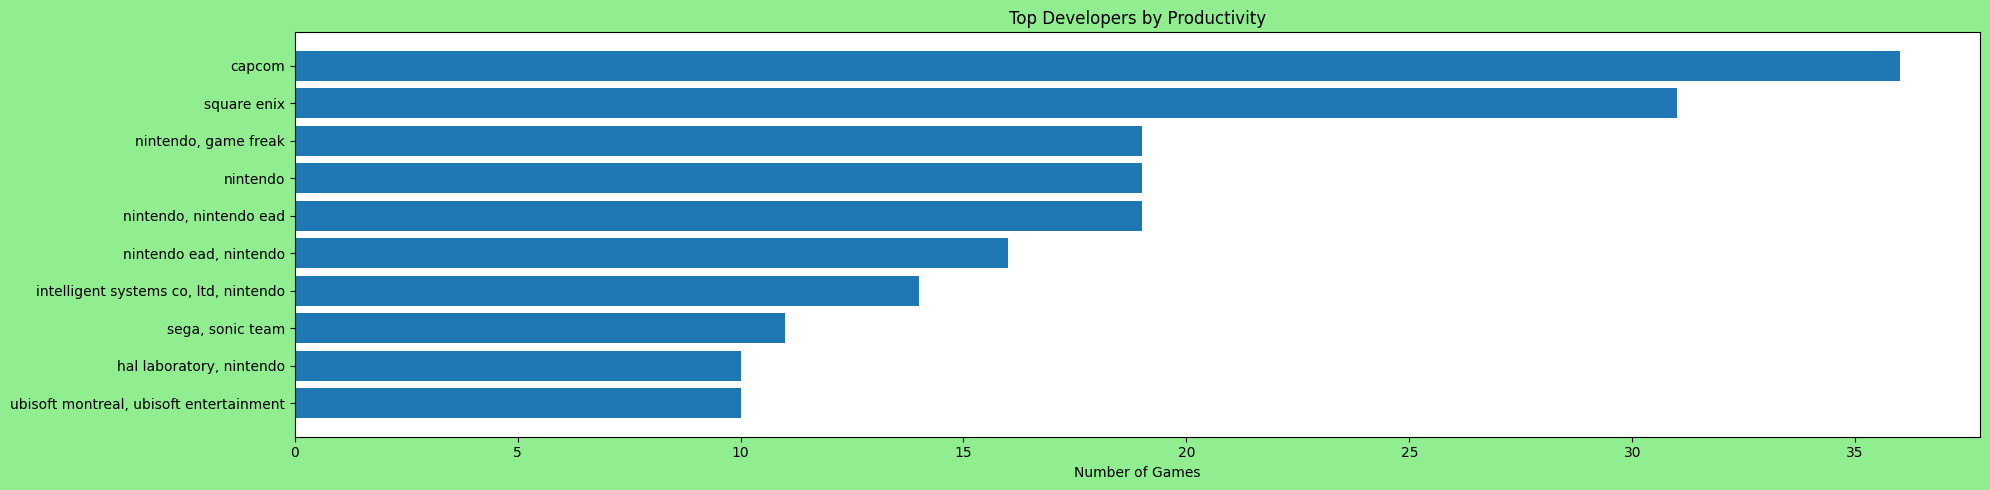

In [43]:
#9.Which developer studios are the most productive and impactful?
prod = datag_merged.groupby(["Team"]).size().sort_values(ascending=False).head(10) #each team is grouped and sorted with size
print(prod)
plt.figure(figsize=(20,5), facecolor="lightgreen")
plt.barh(prod.index.astype(str), prod.values)
plt.gca().invert_yaxis()
plt.xlabel("Number of Games")
plt.title("Top Developers by Productivity")
plt.tight_layout()
plt.show()

In [44]:
datag_merged.to_csv("games_cleaned.csv", index=False)
